# 03. PyTorch Computer Vision Exercise Solutions

In [3]:
!nvidia-smi

Fri Jun 14 19:19:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 538.46                 Driver Version: 538.46       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A40                   TCC   | 00000000:51:00.0 Off |                    0 |
|  0%   29C    P8              12W / 300W |      0MiB / 46068MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
# Create a device agnostic code
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
device=torch.device("cuda:0")
device

device(type='cuda', index=0)

## 5. Load the torchvision.datasets.MNIST() train and test datasets.

In [5]:
import torchvision
from torchvision.datasets import MNIST
from torchvision import transforms

# Get the train data
train_data=MNIST(root="data",
                train=True,
                download=True,
                transform=transforms.ToTensor(),
                target_transform=None)

# Get the test data
test_data=MNIST(root="data",
                train=False,
                download=True,
                transform=transforms.ToTensor(),
                target_transform=None)

train_data,test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [6]:
len(train_data),len(test_data)

(60000, 10000)

In [7]:
# Data is in tuple form (image,label)
image,label=train_data[0][0],train_data[0][1]
print(f"Image shape: {image.shape} -> [color_channels,height,weight]")
print(f"Labels shape: {label} -> no shape, due to being integer")

Image shape: torch.Size([1, 28, 28]) -> [color_channels,height,weight]
Labels shape: 5 -> no shape, due to being integer


In [8]:
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

Note: There are two main agreed upon ways for representing images in machine learning:

1. Color channels first: [color_channels, height, width] (CHW) -> PyTorch default (as of April 2022)
2. Color channels last: [height, width, color_channels] (HWC) -> Matplotlib/TensorFlow default (as of April 2022)

In [9]:
# Get the class names from the datasets
class_names=train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

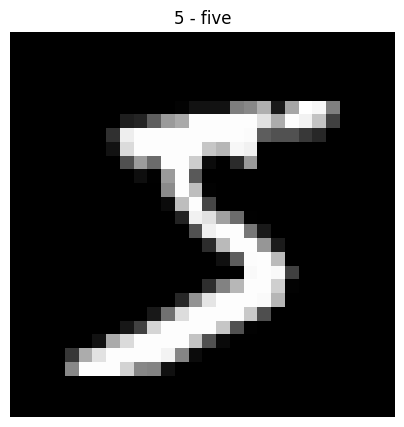

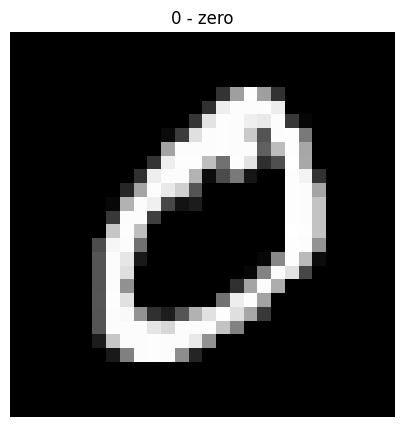

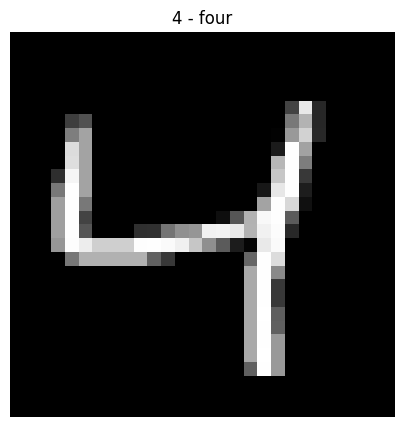

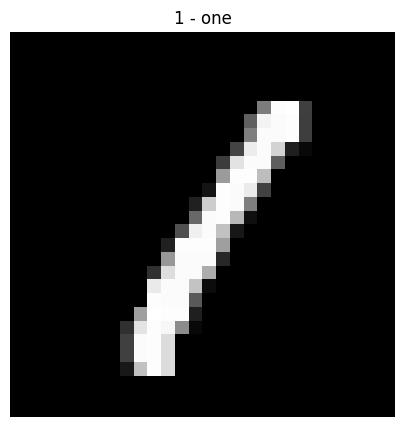

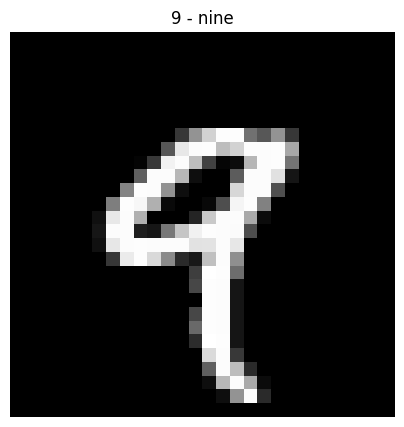

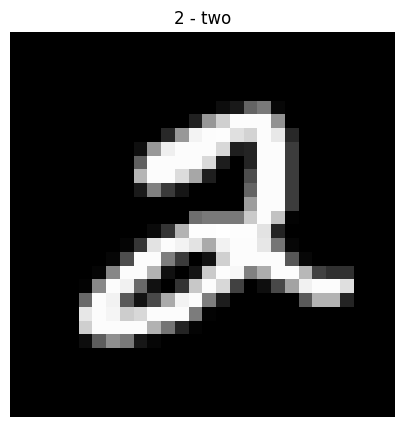

In [10]:
import matplotlib.pyplot as plt
for i in range(6):
    img,label=train_data[i][0],train_data[i][1]
    plt.figure(figsize=(5,5))
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

In [11]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x204e9d268d0>,
 <torch.utils.data.dataloader.DataLoader at 0x204e78cf0b0>)

In [12]:
len(train_dataloader),len(test_dataloader)

(1875, 313)

In [13]:
print(f"Length of train_dataloader: {len(train_dataloader)} batches {BATCH_SIZE}.")
print(f"Length of test_dataloader: {len(test_dataloader)} batches {BATCH_SIZE}.")

Length of train_dataloader: 1875 batches 32.
Length of test_dataloader: 313 batches 32.


In [14]:
for sample in next(iter(train_dataloader)):
    print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


## 8. Recreate model_2 used in notebook 03 (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [15]:
from torch import nn

class MnistModel(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.conv_block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
            
    def forward(self,x):
        x=self.conv_block_1(x)
        x=self.conv_block_2(x)
        x=self.classifier(x)
        return x

In [16]:
device

device(type='cuda', index=0)

In [17]:
model=MnistModel(input_shape=1,
                 hidden_units=10,
                 output_shape=len(class_names)).to(device)

model

MnistModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [18]:
# Check out the model state dict
model.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[-0.0565, -0.2498,  0.1601],
                        [-0.1552, -0.3221, -0.2525],
                        [-0.2535, -0.3112, -0.2380]]],
              
              
                      [[[-0.2195, -0.0546,  0.1248],
                        [ 0.2584,  0.0382,  0.2815],
                        [-0.1982,  0.2042, -0.2578]]],
              
              
                      [[[ 0.0111, -0.0433,  0.0047],
                        [ 0.1286,  0.2206, -0.1819],
                        [ 0.1432, -0.1608, -0.1247]]],
              
              
                      [[[-0.0394, -0.2514, -0.0048],
                        [-0.1884, -0.0390,  0.0218],
                        [-0.1367,  0.3091, -0.3315]]],
              
              
                      [[[ 0.0195,  0.1622,  0.2499],
                        [-0.1605, -0.2586,  0.3263],
                        [ 0.1705, -0.2710,  0.2841]]],
              
              
      

In [19]:
# Try a dummy forward pass
torch.manual_seed(42)
dummy_x=torch.rand(size=(1,28,28)).unsqueeze(dim=0).to(device)
model(dummy_x)

tensor([[ 0.0365, -0.0024,  0.0549, -0.0478, -0.0197, -0.0234, -0.0351,  0.0368,
          0.0034,  0.0122]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [20]:
torch.manual_seed(42)
dummy_x_2=torch.rand(size=(1,10,7,7))
print(dummy_x_2.shape)
flatten_layer=nn.Flatten()
flatten_layer(dummy_x_2).shape

torch.Size([1, 10, 7, 7])


torch.Size([1, 490])

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [21]:
# Calculate acc fn
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc

In [22]:
# Create train_step
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn:accuracy_fn,
               device:torch.device=device):
    
    train_loss,train_acc=0,0
    
    # Training
    model.train()
    
    for batch,(X,y) in enumerate(data_loader):
        
        # Put the data to target device
        X,y=X.to(device),y.to(device)

        # Forward pass
        y_pred=model(X)

        # Calculate loss / acc fn
        loss=loss_fn(y_pred,y)
        train_loss+=loss
        train_acc+=accuracy_fn(y_true=y,
                    y_pred=y_pred.argmax(dim=1))

        # optimizer reset
        optimizer.zero_grad()

        # backpropagation
        loss.backward()

        # optimizer step
        optimizer.step()

        # print out fn
        if batch % 400 ==0:
            print(f"Looked at: {batch*len(X)}/{len(data_loader.dataset)} samples")

    # Divide the loss and acc per batch
    train_loss/=len(data_loader)
    train_acc/=len(data_loader)

    print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.2f}%")    

In [23]:
# Create test_step
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn:accuracy_fn,
              device:torch.device=device):
    
    test_acc,test_loss=0,0
    
    # Testing
    model.eval()
    
    with torch.inference_mode():
        for X,y in data_loader:

            # Put the data to device
            X,y=X.to(device),y.to(device)

            # Forward pass
            y_pred=model(X)

            # Calculate loss / acc
            test_loss+=loss_fn(y_pred,y)
            test_acc+=accuracy_fn(y_true=y,
                                  y_pred=y_pred.argmax(dim=1))

        # Print out fn
        test_loss/=len(data_loader)
        test_acc/=len(data_loader)
        
    print(f"Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%\n")

In [24]:
# Create running time cals
def print_train_time(start:float,
                     end:float,
                     device:torch.device=device):
    
    total_time=end-start
    print(f"Total time on {device}: {total_time:.3f} seconds")
    return total_time   

In [25]:
# create the model on cpu
model_cpu= MnistModel(input_shape=1,
                      hidden_units=10,
                      output_shape=10).to("cpu")
model_cpu

MnistModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [26]:
# Setup loss and optimizer on CPU
loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model_cpu.parameters(),
                          lr=0.1)

In [27]:
# Train the model on CPU
torch.manual_seed(42)

# set epochs
epochs=5

from timeit import default_timer as timer
from tqdm.auto import tqdm

train_time_start_on_cpu=timer()

for epoch in tqdm(range(epochs)):
    print(f"Epochs: {epoch}\n------\n")
    train_step(model=model_cpu,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device="cpu")
    test_step(model=model_cpu,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device="cpu")

train_time_end_on_cpu=timer()

# Calculate print time fn
total_train_time_model_cpu=print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_cpu.parameters()).device))

C:\Users\Shibu.AI-SERVER\.conda\envs\shibu_env1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Epochs: 0
------

Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 0.2615 | Train acc: 91.36%


 20%|████████████████▊                                                                   | 1/5 [00:14<00:58, 14.63s/it]

Test loss: 0.0781 | Test acc: 97.52%

Epochs: 1
------

Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 0.0746 | Train acc: 97.60%


 40%|█████████████████████████████████▌                                                  | 2/5 [00:32<00:50, 16.69s/it]

Test loss: 0.0547 | Test acc: 98.34%

Epochs: 2
------

Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 0.0570 | Train acc: 98.18%


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:48<00:32, 16.35s/it]

Test loss: 0.0555 | Test acc: 98.29%

Epochs: 3
------

Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 0.0480 | Train acc: 98.51%


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [01:04<00:16, 16.19s/it]

Test loss: 0.0479 | Test acc: 98.35%

Epochs: 4
------

Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 0.0424 | Train acc: 98.68%


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:19<00:00, 15.87s/it]

Test loss: 0.0404 | Test acc: 98.68%

Total time on cpu: 79.372 seconds


In [28]:
# Create a model on GPU
model_GPU=MnistModel(input_shape=1,
                     hidden_units=10,
                     output_shape=len(class_names)).to(device)
model_GPU

MnistModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [29]:
# Setup loss / optimizer fn on GPU
loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model_GPU.parameters(),
                          lr=0.1)

In [30]:
# Train the model on GPU
# Setup required libaries
from tqdm.auto import tqdm
from timeit import default_timer as timer

# Setup random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Setup epochs
epochs=5

# Start timer
train_time_start_on_GPU=timer()

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------\n")
    train_step(model=model_GPU,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_GPU,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

# stop timer
train_time_end_on_GPU=timer()

# Calculate the total train time on GPU
total_train_time_model_GPU=print_train_time(start=train_time_start_on_GPU,
                                            end=train_time_end_on_GPU,
                                            device=device)

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------

Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 0.3195 | Train acc: 89.57%


 20%|████████████████▊                                                                   | 1/5 [00:11<00:46, 11.67s/it]

Test loss: 0.0707 | Test acc: 97.89%

Epoch: 1
-------

Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 0.0762 | Train acc: 97.64%


 40%|█████████████████████████████████▌                                                  | 2/5 [00:22<00:33, 11.31s/it]

Test loss: 0.0540 | Test acc: 98.18%

Epoch: 2
-------

Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 0.0596 | Train acc: 98.19%


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:33<00:22, 11.21s/it]

Test loss: 0.0520 | Test acc: 98.28%

Epoch: 3
-------

Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 0.0516 | Train acc: 98.35%


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:44<00:11, 11.18s/it]

Test loss: 0.0546 | Test acc: 98.25%

Epoch: 4
-------

Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 0.0463 | Train acc: 98.54%


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:56<00:00, 11.26s/it]

Test loss: 0.0399 | Test acc: 98.50%

Total time on cuda:0: 56.312 seconds


In [31]:
# Test the model

#import required liberies
from tqdm.auto import tqdm

def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn:accuracy_fn,
               device:torch.device=device):
    
    loss,acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):

            # Put data to target device
            X,y=X.to(device),y.to(device)
            
            # Forward pass
            y_pred=model(X)

            # loss / acc cals
            loss+=loss_fn(y_pred,y)
            acc+=accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

        loss/=len(data_loader)
        acc/=len(data_loader)

    return {"model name":model.__class__.__name__,
            "model loss":loss.item(),
            "model acc":acc}

In [32]:
model_cpu_results=eval_model(model=model_cpu,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device="cpu")

model_GPU_results=eval_model(model=model_GPU,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
print(model_cpu_results)
print(model_GPU_results)

100%|███████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 258.20it/s]

{'model name': 'MnistModel', 'model loss': 0.040352288633584976, 'model acc': 98.68210862619809}
{'model name': 'MnistModel', 'model loss': 0.039938077330589294, 'model acc': 98.50239616613419}


In [33]:
import pandas as pd
pd.DataFrame(model_cpu_results,model_GPU_results)

,model name,model loss,model acc
model name,MnistModel,0.040352,98.682109
model loss,MnistModel,0.040352,98.682109
model acc,MnistModel,0.040352,98.682109


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [34]:
# Make predictions

def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):

    pred_probs=[]
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for sample in data:
            # prepare sample to add batch dim to target device
            sample=torch.unsqueeze(sample,dim=0).to(device)

            # Forward Pass
            pred_logits=model(sample)

            # logits -> prob predictions
            pred_prob=torch.softmax(pred_logits.squeeze(),dim=0)

            # Get pred prob off the GPU for futher calculatiosn
            pred_probs.append(pred_prob.cpu())

    # Stack the pred probs to turn list into a tensor
    return torch.stack(pred_probs)

In [35]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [36]:
img,label=test_data[0][:5]
img.shape,label

(torch.Size([1, 28, 28]), 7)

In [37]:
import random
random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=5):
    test_samples.append(sample)
    test_labels.append(label)

test_labels

[2, 1, 2, 4, 6]

In [38]:
predictions=make_predictions(model=model_cpu,
                                    data=test_samples,
                                    device=device)

In [39]:
# Prediction label on cpu
predictions_labels=torch.argmax(predictions,dim=1)
predictions_labels

tensor([2, 1, 2, 4, 6])

In [40]:
test_labels

[2, 1, 2, 4, 6]

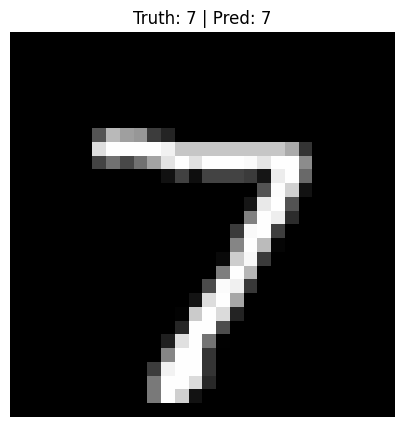

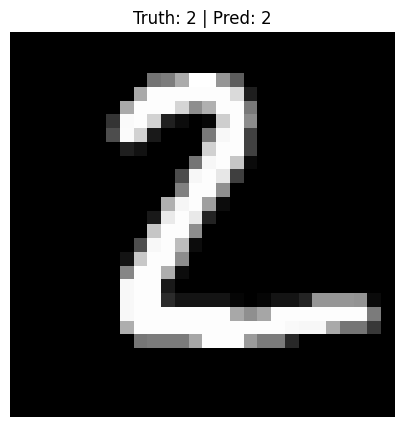

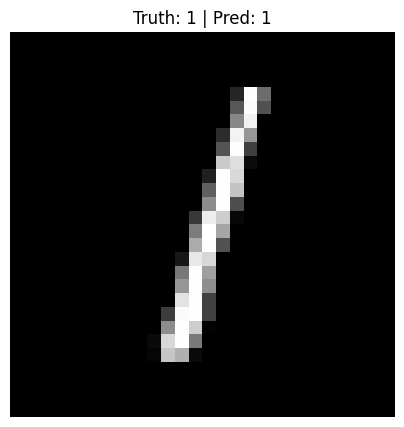

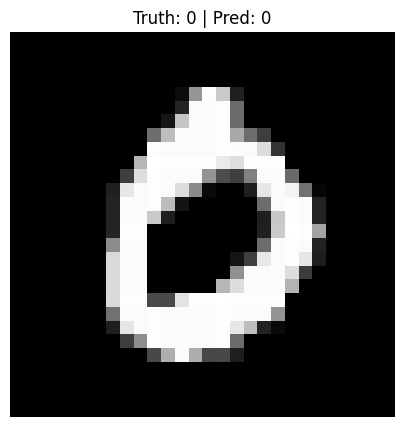

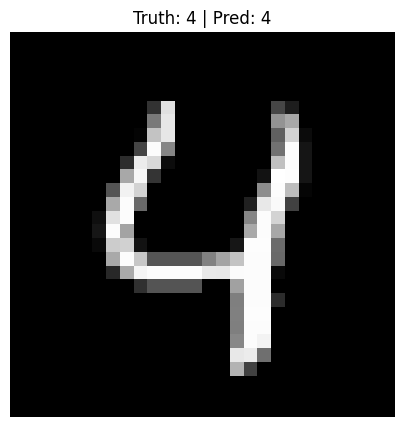

In [41]:
# Visualize the data
for i in range(5):
    # Get img,labels from the test data
    img,label=test_data[i][0],test_data[i][1]

    #Make prediction on image
    model_pred_logits=model_GPU(img.unsqueeze(dim=0).to(device))
    model_pred_probs=torch.softmax(model_pred_logits,dim=1)
    model_pred_label=torch.argmax(model_pred_probs,dim=1)

    # Plot the img and predictions
    plt.figure(figsize=(5,5))
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
    plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [42]:
# Make prediction across the test data
from tqdm.auto import tqdm
y_preds=[]
model_GPU.eval()
with torch.inference_mode():
    for batch,(X,y) in tqdm(enumerate(test_dataloader)):
        X,y=X.to(device),y.to(device)
        y_pred_logits=model_GPU(X)
        y_pred_labels=torch.argmax(torch.softmax(y_pred_logits,dim=1),dim=1)
        y_preds.append(y_pred_labels)
    y_preds=torch.cat(y_preds).cpu()

len(y_preds)

313it [00:01, 266.78it/s]


10000

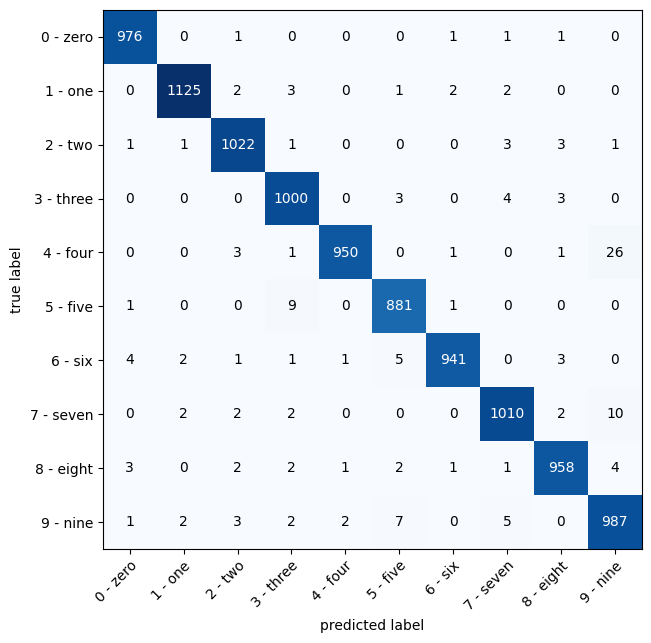

In [43]:
# Setup confusion matrix
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat=ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor=confmat(preds=y_preds,target=test_data.targets)

# Plot the confusion matrix
fix,ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                             class_names=class_names,
                             figsize=(10,7))

## 12. Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?

In [44]:
random_tensor=torch.rand([1,3,64,64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [45]:
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=64,
                     kernel_size=3,
                     stride=2,
                     padding=1)
random_tensor_through_conv_layer=conv_layer(random_tensor)
random_tensor_through_conv_layer.shape

torch.Size([1, 64, 32, 32])

## 13. Use a model similar to the trained model_2 from notebook 03 to make predictions on the test torchvision.datasets.FashionMNIST dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [46]:
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor

Fashion_Mnist_train_data=FashionMNIST(root="data_1",
                                      train=True,
                                      download=True,
                                      transform=ToTensor(),
                                      target_transform=None)

Fashion_Mnist_test_data=FashionMNIST(root="data_1",
                                     train=False,
                                     download=True,
                                     transform=ToTensor(),
                                     target_transform=None)

len(Fashion_Mnist_train_data),len(Fashion_Mnist_test_data)

(60000, 10000)

In [47]:
from torch.utils.data import DataLoader

Fashion_Mnist_train_dataloader=DataLoader(dataset=Fashion_Mnist_train_data,
                                          batch_size=32,
                                          shuffle=True)

Fashion_Mnist_test_dataloader=DataLoader(dataset=Fashion_Mnist_test_data,
                                         batch_size=32,
                                         shuffle=False)
len(Fashion_Mnist_train_dataloader),len(Fashion_Mnist_test_dataloader)

(1875, 313)

In [48]:
Fashion_Mnist_class_names=Fashion_Mnist_train_data.classes
Fashion_Mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [49]:
model_2=MnistModel(input_shape=1,
                   hidden_units=10,
                   output_shape=len(Fashion_Mnist_class_names)).to(device)
model_2

MnistModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [50]:
# Setup loss / optimizer
loss_fn=nn.CrossEntropyLoss()

optimizer_2=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.1)

In [51]:
# Setup training
from tqdm.auto import tqdm
from timeit import default_timer as timer

epochs=5
FashionMnist_train_start_time=timer()

for epoch in tqdm(range(epochs)):
    print(f"Epochs: {epoch}\n-------\n")
    train_step(model=model_2,
               data_loader=Fashion_Mnist_train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer_2,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              data_loader=Fashion_Mnist_test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

FashionMnist_train_end_time=timer()

total_train_time_model_2=print_train_time(start=FashionMnist_train_start_time,
                                          end=FashionMnist_train_end_time,
                                          device=device)

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Epochs: 0
-------

Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 0.5560 | Train acc: 80.18%


 20%|████████████████▊                                                                   | 1/5 [00:11<00:45, 11.25s/it]

Test loss: 0.3787 | Test acc: 86.19%

Epochs: 1
-------

Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 0.3448 | Train acc: 87.62%


 40%|█████████████████████████████████▌                                                  | 2/5 [00:22<00:33, 11.33s/it]

Test loss: 0.3236 | Test acc: 88.44%

Epochs: 2
-------

Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 0.3127 | Train acc: 88.68%


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:33<00:22, 11.25s/it]

Test loss: 0.3181 | Test acc: 88.43%

Epochs: 3
-------

Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 0.2947 | Train acc: 89.30%


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:44<00:11, 11.17s/it]

Test loss: 0.2989 | Test acc: 89.30%

Epochs: 4
-------

Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 0.2803 | Train acc: 89.76%


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:55<00:00, 11.19s/it]

Test loss: 0.3075 | Test acc: 88.51%

Total time on cuda:0: 55.978 seconds


In [52]:
# Make prediction with model_2
from tqdm.auto import tqdm

test_preds=[]
model_2.eval()
with torch.inference_mode():
    for X_test,y_test in tqdm(Fashion_Mnist_test_dataloader):
        y_logits=model_2(X_test.to(device))
        y_pred_probs=torch.softmax(y_logits,dim=1)
        y_pred_labels=torch.argmax(y_pred_probs,dim=1)
        test_preds.append(y_pred_labels)
    test_preds=torch.cat(test_preds).cpu()

len(test_preds)

100%|███████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 273.36it/s]


10000

In [53]:
# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes=np.where(test_preds != Fashion_Mnist_test_data.targets)[0]
len(wrong_pred_indexes)

1150

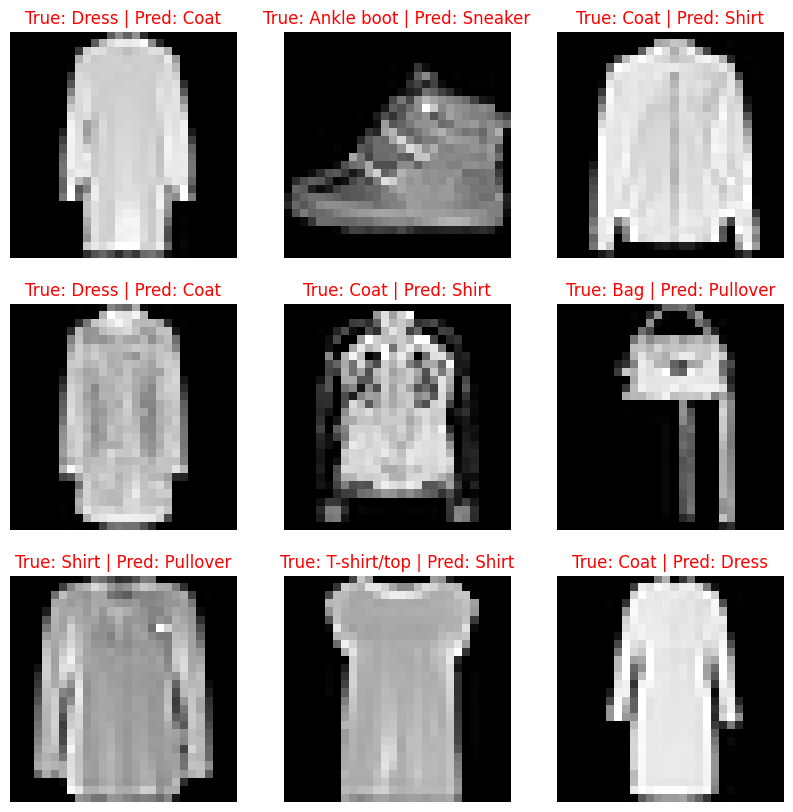

In [54]:
# select random 9 wrong predictions and plot them
import random
random_selection=random.sample(list(wrong_pred_indexes),k=9)

plt.figure(figsize=(10,10))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = Fashion_Mnist_class_names[Fashion_Mnist_test_data[idx][1]]
  pred_label = Fashion_Mnist_class_names[test_preds[idx]]

  # Plot the wrong prediction with its original label
  plt.subplot(3, 3, i+1)
  plt.imshow(Fashion_Mnist_test_data[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False)

In [56]:
# Save the model
from pathlib import Path
# Create a model path
MODEL_PATH=Path("Models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create a model name
MODEL_NAME_1="03_pytorch_computer_vision_exercises_model_GPU"
MODEL_NAME_2="03_pytorch_computer_vision_exercises_model_cpu"
MODEL_SAVE_PATH_GPU=MODEL_PATH / MODEL_NAME_1
MODEL_SAVE_PATH_CPU=MODEL_PATH / MODEL_NAME_2

# Save the model_GPU
print(f"Saving model to: {MODEL_SAVE_PATH_GPU}")
torch.save(obj=model_GPU.state_dict(),
           f=MODEL_SAVE_PATH_GPU)

print(f"Saving model to: {MODEL_SAVE_PATH_CPU}")
torch.save(obj=model_cpu.state_dict(),
           f=MODEL_SAVE_PATH_CPU)

Saving model to: Models\03_pytorch_computer_vision_exercises_model_GPU
Saving model to: Models\03_pytorch_computer_vision_exercises_model_cpu
